In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
img_rows = 28
img_cols = 28
channels =1

img_shape = (28, 28, 1)
z_dim = 100

In [5]:
def build_generator(z_dim):
  model = Sequential()
  model.add(Dense(256 * 7 * 7, input_dim = z_dim))
  model.add(Reshape((7,7,256)))

  model.add(Conv2DTranspose(128, kernel_size= 3, strides= 2, padding= 'same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha= 0.01))

  model.add(Conv2DTranspose(64, kernel_size= 3,strides=1 ,padding= 'same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha= 0.01))

  model.add(Conv2DTranspose(1, kernel_size= 3, strides= 2, padding='same'))
  model.add(Activation('tanh'))

  return model

In [8]:
def build_discriminator(img_shape):
  model = Sequential()

  model.add(Conv2D(32,
                   kernel_size = 3,
                   strides = 2,
                   input_shape = img_shape,
                   padding = 'same'))
  
  model.add(LeakyReLU(alpha= 0.01))

  model.add(Conv2D(64,
                   kernel_size = 3,
                   strides = 2,
                   padding = 'same'))
  
  model.add(LeakyReLU(alpha= 0.01))

  model.add(Conv2D(128,
                  kernel_size = 3,
                  strides = 2,
                  padding = 'same'))
  
  model.add(LeakyReLU(alpha= 0.01))

  model.add(Flatten())
  model.add(Dense(1, activation= 'sigmoid'))

  return model

In [9]:
def build_gan(generator, discriminator):
  model = Sequential()

  model.add(generator)
  model.add(discriminator)

  return model


discriminator = build_discriminator(img_shape)
generator = build_generator(z_dim)

discriminator.compile(loss = 'binary_crossentropy',
                      optimizer = Adam(),
                      metrics = ['accuracy'])
discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(loss = 'binary_crossentropy', optimizer = Adam())

In [10]:
losses = []
accuracies = []
iteration_checkpoint = []

def train(iterations, batch_size, sample_interval):
  (X_train, _), (_, _) = fashion_mnist.load_data()

  X_train = X_train / 127.5 -1.0
  X_train = np.expand_dims(X_train, axis= 3)

  real = np.ones((batch_size, 1))
  fake = np.zeros((batch_size , 1))

  for iteration in range(iterations):
    
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)

    d_loss_real = discriminator.train_on_batch(imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

    z = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(z)

    g_loss = gan.train_on_batch(z, real)
    if (iteration + 1) % sample_interval == 0:
      losses.append((d_loss, g_loss))
      accuracies.append(100.0 * accuracy)
      iteration_checkpoint.append(iteration + 1)

      print(f'iter : {iteration + 1}[D손실 : {d_loss}], [정확도 : {100.0 * accuracy}] [G손실 : {g_loss}]')

      sample_images(generator)

In [11]:
def sample_images(generator, image_grid_rows = 4, image_gird_columns = 4):
  z = np.random.normal(0, 1, (image_grid_rows * image_gird_columns, z_dim))

  gen_imgs = generator.predict(z)
  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(image_grid_rows,
                          image_gird_columns,
                          figsize = (4,4),
                          sharex = True,
                          sharey = True)
  
  cnt = 0 
  for i in range(image_grid_rows):
    for j in range(image_gird_columns):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap = 'gray')
      axs[i, j].axis('off')
      cnt += 1

  plt.show()

4423680/4422102 [==============================] - 0s 0us/step
iter : 1000[D손실 : 0.47012071311473846], [정확도 : 80.46875] [G손실 : 1.6408143043518066]


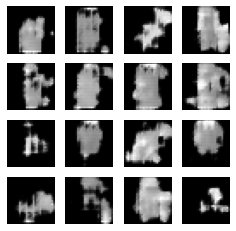

iter : 2000[D손실 : 0.3777031898498535], [정확도 : 86.71875] [G손실 : 2.3106908798217773]


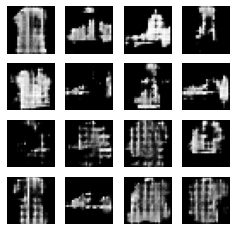

iter : 3000[D손실 : 0.2866601496934891], [정확도 : 89.84375] [G손실 : 2.337625741958618]


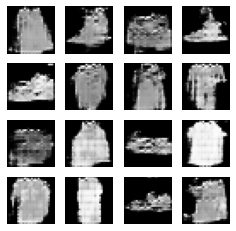

iter : 4000[D손실 : 0.3370603173971176], [정확도 : 86.71875] [G손실 : 2.0576961040496826]


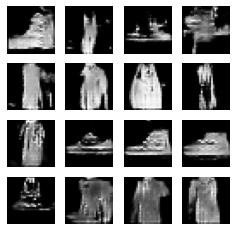

iter : 5000[D손실 : 0.4012328237295151], [정확도 : 81.25] [G손실 : 1.719845175743103]


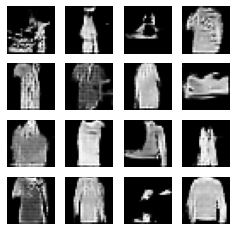

iter : 6000[D손실 : 0.28768351674079895], [정확도 : 87.109375] [G손실 : 2.0939455032348633]


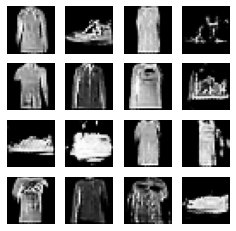

iter : 7000[D손실 : 0.39511415362358093], [정확도 : 82.421875] [G손실 : 1.9020991325378418]


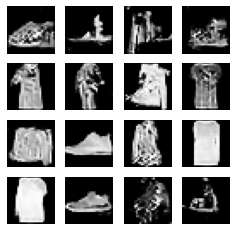

iter : 8000[D손실 : 0.2953684478998184], [정확도 : 87.890625] [G손실 : 2.0524039268493652]


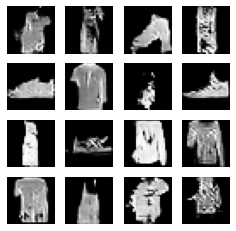

iter : 9000[D손실 : 0.3141029477119446], [정확도 : 85.9375] [G손실 : 2.32429838180542]


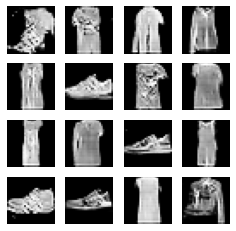

iter : 10000[D손실 : 0.3012356832623482], [정확도 : 87.5] [G손실 : 2.0896804332733154]


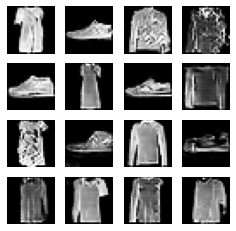

iter : 11000[D손실 : 0.4347851574420929], [정확도 : 82.03125] [G손실 : 1.7684317827224731]


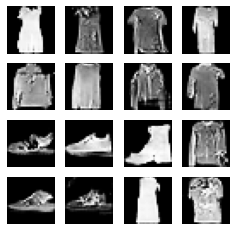

iter : 12000[D손실 : 0.30577588081359863], [정확도 : 89.0625] [G손실 : 2.0648069381713867]


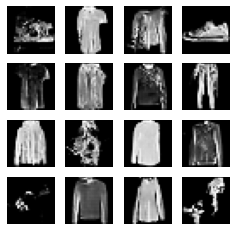

iter : 13000[D손실 : 0.36854903399944305], [정확도 : 81.640625] [G손실 : 1.940656304359436]


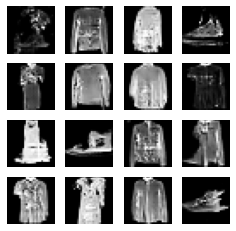

iter : 14000[D손실 : 0.22110319137573242], [정확도 : 89.0625] [G손실 : 2.5677342414855957]


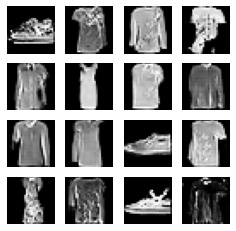

iter : 15000[D손실 : 0.3757908493280411], [정확도 : 81.25] [G손실 : 2.129751205444336]


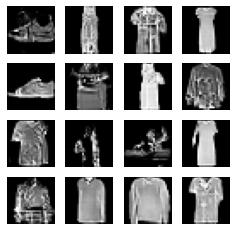

iter : 16000[D손실 : 0.2927589416503906], [정확도 : 88.28125] [G손실 : 2.076295852661133]


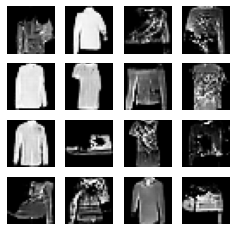

iter : 17000[D손실 : 0.3624749481678009], [정확도 : 80.859375] [G손실 : 2.208688735961914]


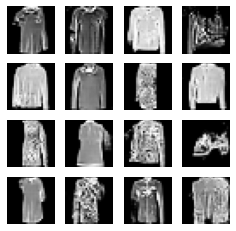

iter : 18000[D손실 : 0.3727158010005951], [정확도 : 83.984375] [G손실 : 2.1710824966430664]


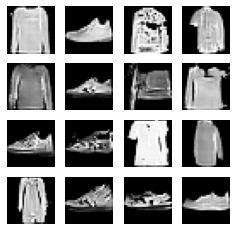

iter : 19000[D손실 : 0.3073992282152176], [정확도 : 86.71875] [G손실 : 1.8185616731643677]


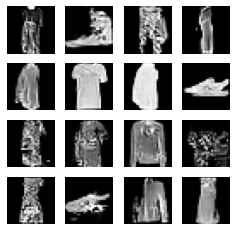

iter : 20000[D손실 : 0.3551828861236572], [정확도 : 85.9375] [G손실 : 1.896675944328308]


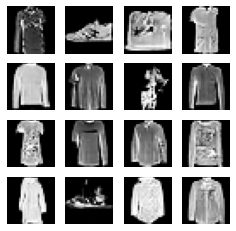

In [12]:
iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size= batch_size , sample_interval= sample_interval)